**1. Define Problem Statement and perform Exploratory Data Analysis:**

**1.1 Definition of problem**

 LoanTap aims to build an underwriting layer that assesses the creditworthiness of MSMEs and individuals. Specifically, for individuals seeking a Personal Loan, the team needs to develop a model that evaluates a set of attributes to determine whether to extend a credit line to the applicant.

 Additionally, if the applicant is deemed creditworthy, the model should provide recommendations regarding the appropriate repayment terms for the loan, ensuring it aligns with LoanTap's commitment to delivering instant, flexible loans on consumer-friendly terms to salaried professionals and businessmen.


In [483]:
# Importing necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder #label encoding binary columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report #to calculate roc score and f1_score


from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate multicollinearity.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

**2. Data Preprocessing**

In [5]:
data = pd.read_csv("/content/drive/MyDrive/logistic regression dataset/logistic_regression.csv")

In [6]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
data.shape

(396030, 27)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
# printing unique values in dataset

object_col = data.select_dtypes(include = "object").columns
for i in object_col:
  print(i, data[i].nunique())

term 2
grade 7
sub_grade 35
emp_title 173105
emp_length 11
home_ownership 6
verification_status 3
issue_d 115
loan_status 2
purpose 14
title 48816
earliest_cr_line 684
initial_list_status 2
application_type 3
address 393700


earliest_cr_line and issue_ d is to be converted into datatime.

In [11]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format="%b-%Y")
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format="%b-%Y")

In [12]:
# Map the categories to numerical values
data["emp_length"].fillna("Unknown", inplace = True)

category_order = {'10+ years': 10, '4 years': 4, '< 1 year': 0, '6 years': 6, '9 years': 9,
                  '2 years': 2, '3 years': 3, '8 years': 8, '7 years': 7, '5 years': 5, "1 year": 1, 'Unknown': 0}

data["emp_length"] = data["emp_length"].replace(category_order)


data["emp_length"] = data["emp_length"].astype(int)


In [13]:
data.duplicated().sum()

0

In [14]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [15]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
data.fillna(value=fill_values, inplace=True)

In [16]:
# filling null values in mort account by grouped mean aggrigation of total_acc

map = data.groupby('total_acc')['mort_acc'].mean()

def mapp(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return map[total_acc]
  else:
    return mort_acc


data['mort_acc'] = data.apply(lambda x: mapp(x['total_acc'],x['mort_acc']), axis=1)


In [17]:
# filling null values with mean/mode values
data["emp_length"].fillna("0 years", inplace = True)
data["revol_util"].fillna(data["revol_util"].mean(), inplace = True)
data["mort_acc"].fillna(data["mort_acc"].mean(), inplace = True)
data["pub_rec_bankruptcies"].fillna(data["pub_rec_bankruptcies"].mean(), inplace = True)

In [18]:
# getting pin code from address
data["address"] = data["address"].str.slice(start=-6).astype(object)
data["address"].nunique()

10

In [19]:
# Creating a feature using 2 date columns. i.e. months afte earliest reported credit line was opened and The month which the loan was funded
data['date_diff'] = (data['issue_d'] - data['earliest_cr_line'])
data['date_diff'] = data['date_diff'].astype(str).str.slice(0, -5).astype(int)/30

In [20]:
# we can classify pub_rec_bankruptcies into binary category where is 1 represent yes and no if record is more than 1.
data["pub_rec_bankruptcies"] = np.where(data["pub_rec_bankruptcies"]>1, 1, 0)
data["pub_rec"] = np.where(data["pub_rec"]>1, 1, 0)


data[['pub_rec_bankruptcies', 'pub_rec']] = data[['pub_rec_bankruptcies', 'pub_rec']].astype('O')

In [21]:
data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
date_diff               0
dtype: int64

Outlier Treatment

In [22]:
num_cols = data.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'date_diff'],
      dtype='object')

Univariate Analysis

Distribution of numerical column

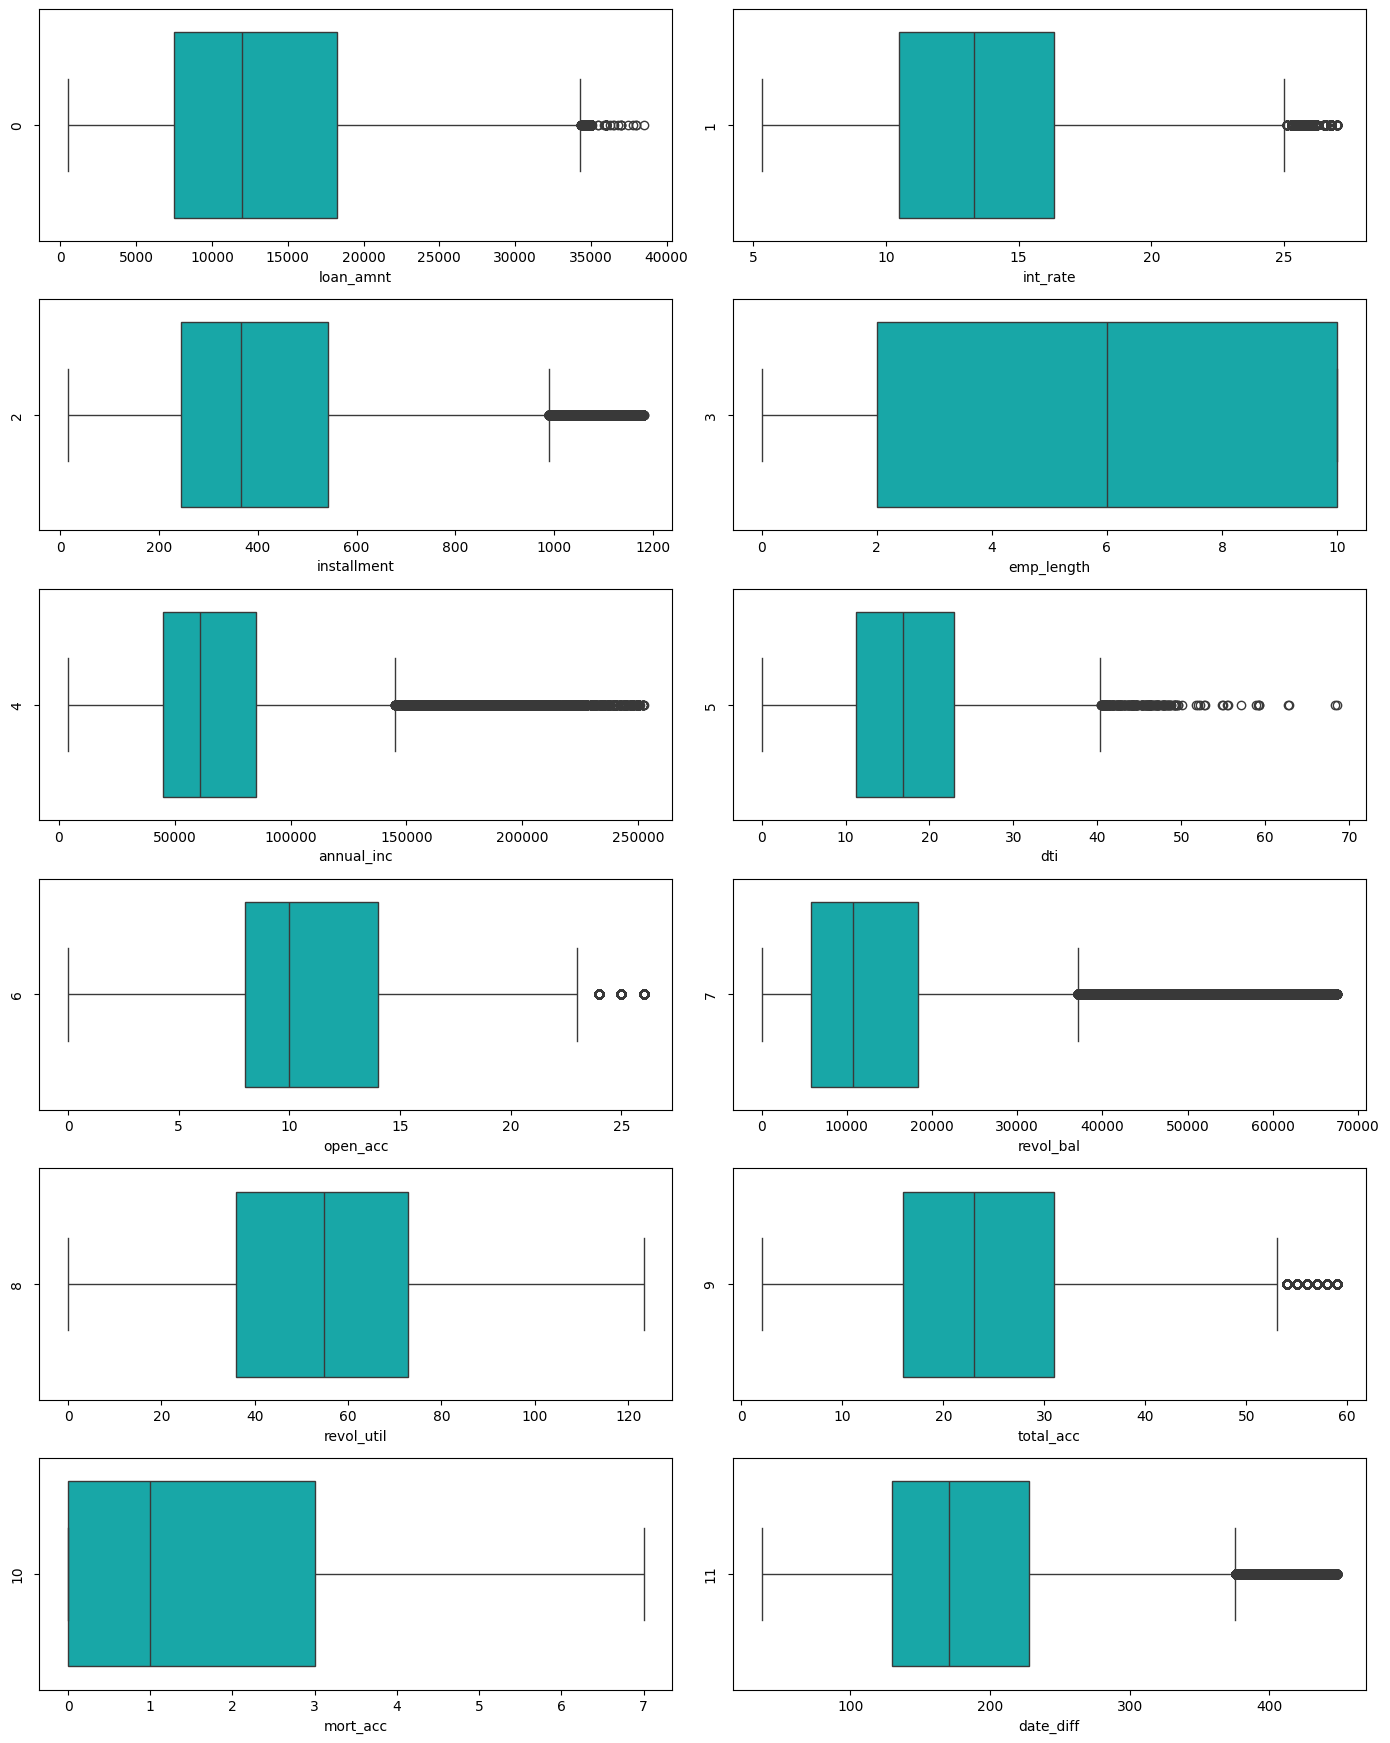

In [126]:
fig = plt.figure(figsize= (14, 20))
plt.title("Distribution of numerical column")

for i in range(0, len(num_cols)):
  ax= plt.subplot(7,2, i+1)

  sns.boxplot(x = data[num_cols[i]], color = "c")
  plt.tight_layout()

  plt.ylabel(i)

Removing the outliers in all numerical columns using 68, 95, 99 rule

In [24]:
for i in num_cols:
  mean = data[i].mean()
  std = data[i].std()
  upper = mean + 3*std
  data = data[data[i] < upper]


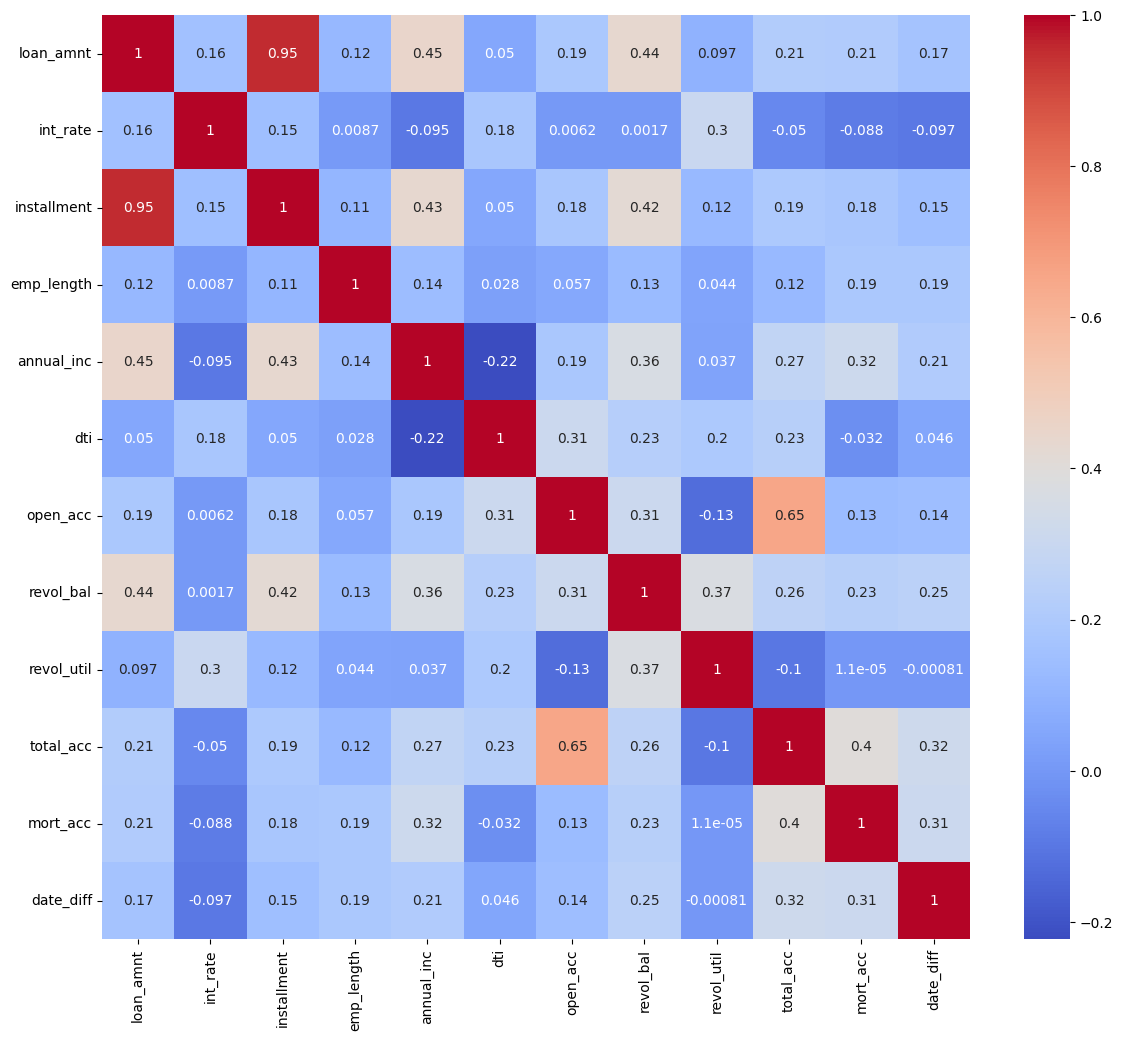

In [125]:
#Correlation between numerical features
plt.figure(figsize = (14, 12))
sns.heatmap(data[num_cols].corr(), cmap = "coolwarm", annot = True)
plt.show()

There is correlation between some feature:
* loan_amont is correlated with installment> revol_bal> annual_inc
* total_acc is correlated with open_acc
* mort_acc is correlated with total_acc
* revol_bal is correlated with installment> annual_inc

Correlated features to be handled before model training.

Distribution of catergorical columns

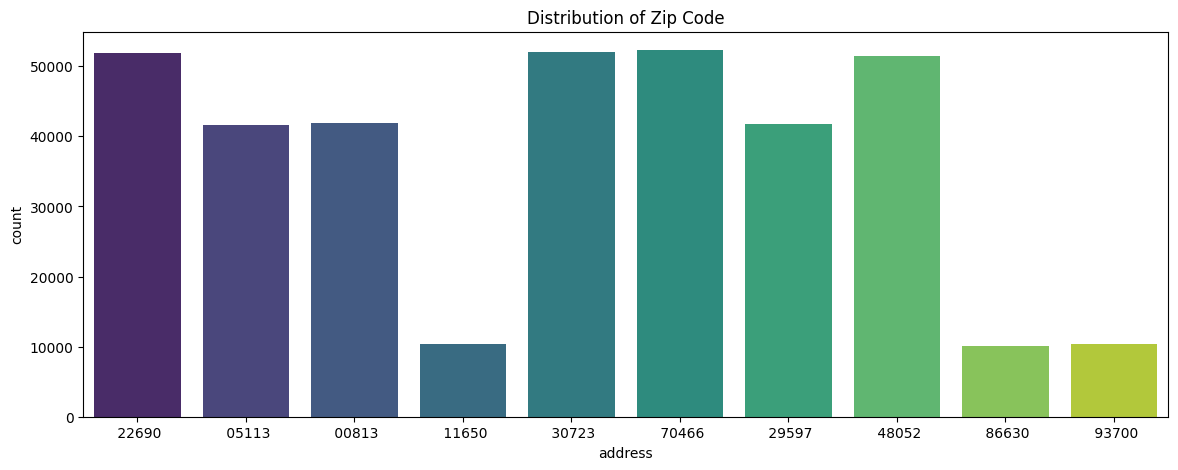

In [124]:
plt.figure(figsize=(14,5))
sns.countplot(x=data['address'], palette='viridis')
plt.title('Distribution of Zip Code')
plt.show()

In [26]:
object_col

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

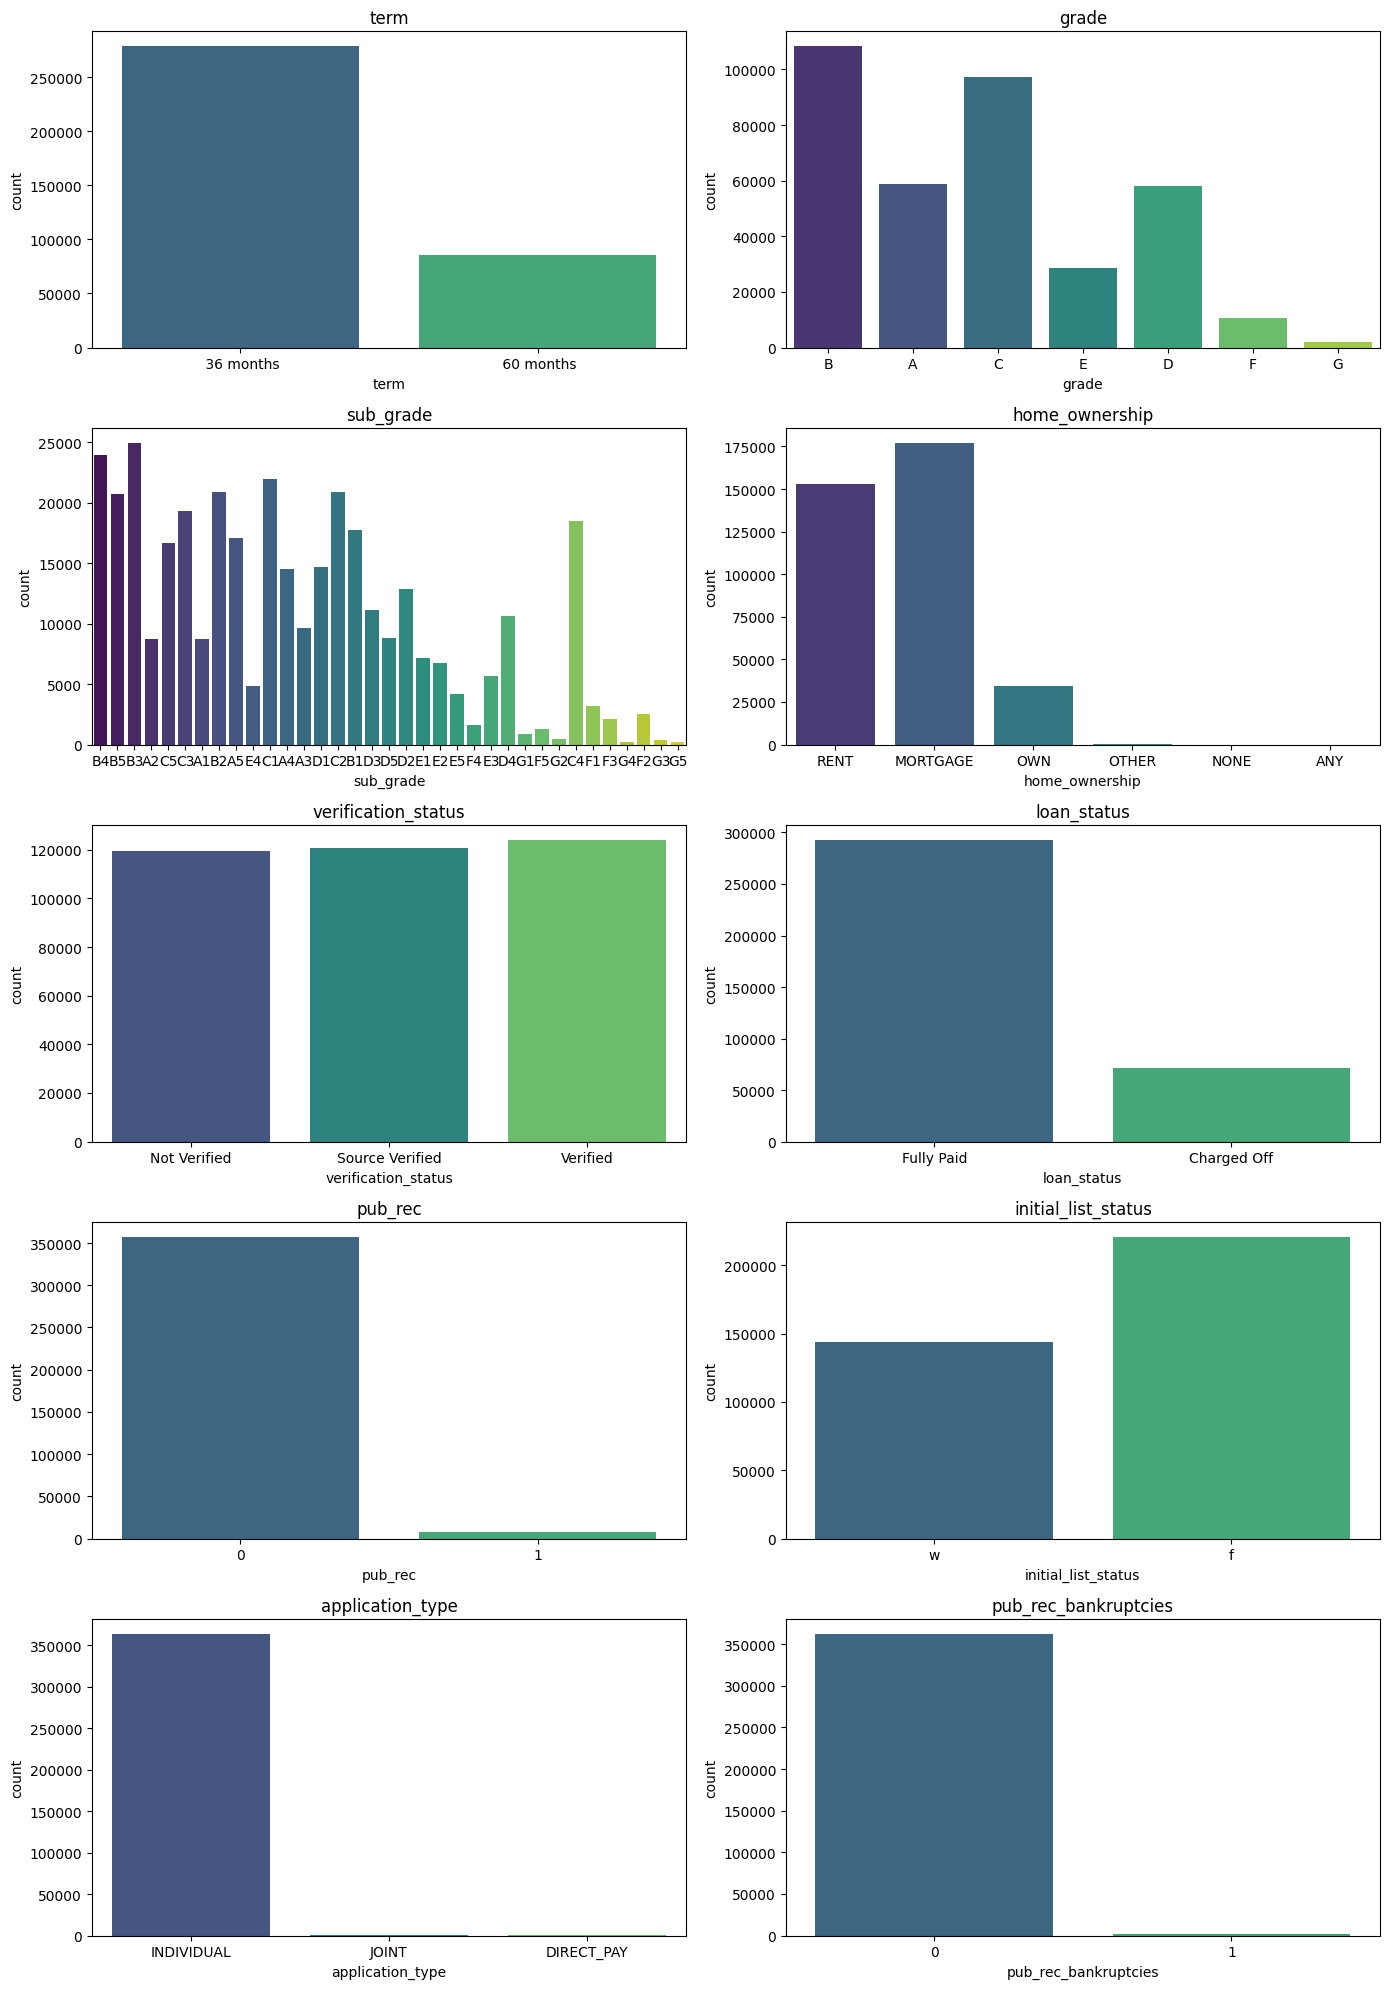

In [29]:
#Distribution of categorical variables
object_cols = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(14,20))

for i in range(len(object_cols)):

  ax=plt.subplot(5,2,i+1)
  sns.countplot(x=data[object_cols[i]], palette='viridis')
  plt.title(f'{object_cols[i]}')


plt.tight_layout()
plt.show()

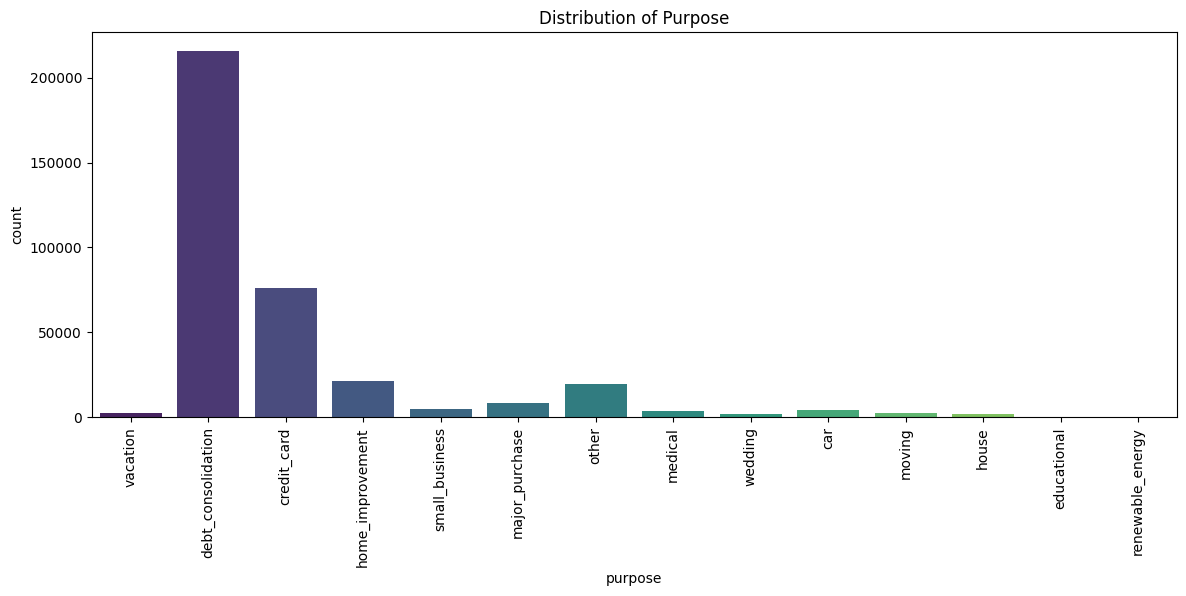

In [121]:
plt.figure(figsize=(14,5))
sns.countplot(x=data['purpose'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Purpose')
plt.show()

Bivariate Analysis: Impact of features on target variable for catergorical feaures

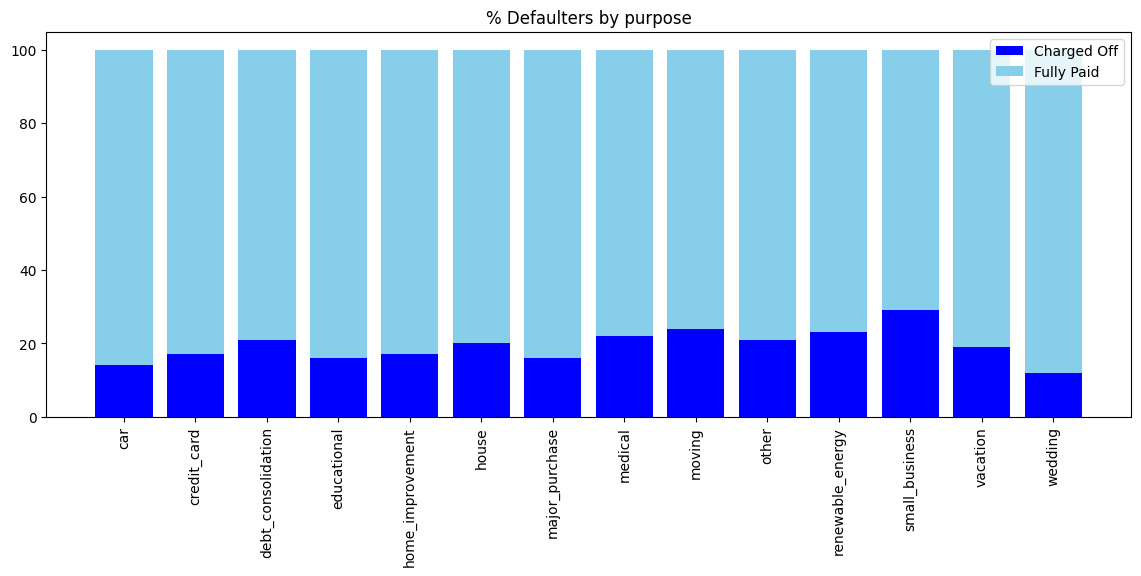

In [122]:
df1 = data.pivot_table(index= "purpose", columns='loan_status', aggfunc='count', values='address')
count = df1.sum(axis=1)
df1 = (df1.div(count, axis = 0)*100).round()
df1.reset_index(inplace=True)

plt.figure(figsize = (14, 5))
plt.bar(df1["purpose"],df1['Charged Off'], color='blue')
plt.bar(df1["purpose"],df1['Fully Paid'], color='skyblue', bottom=df1['Charged Off'])
plt.xticks(rotation=90)
plt.title("% Defaulters by purpose")
plt.legend(['Charged Off','Fully Paid'])

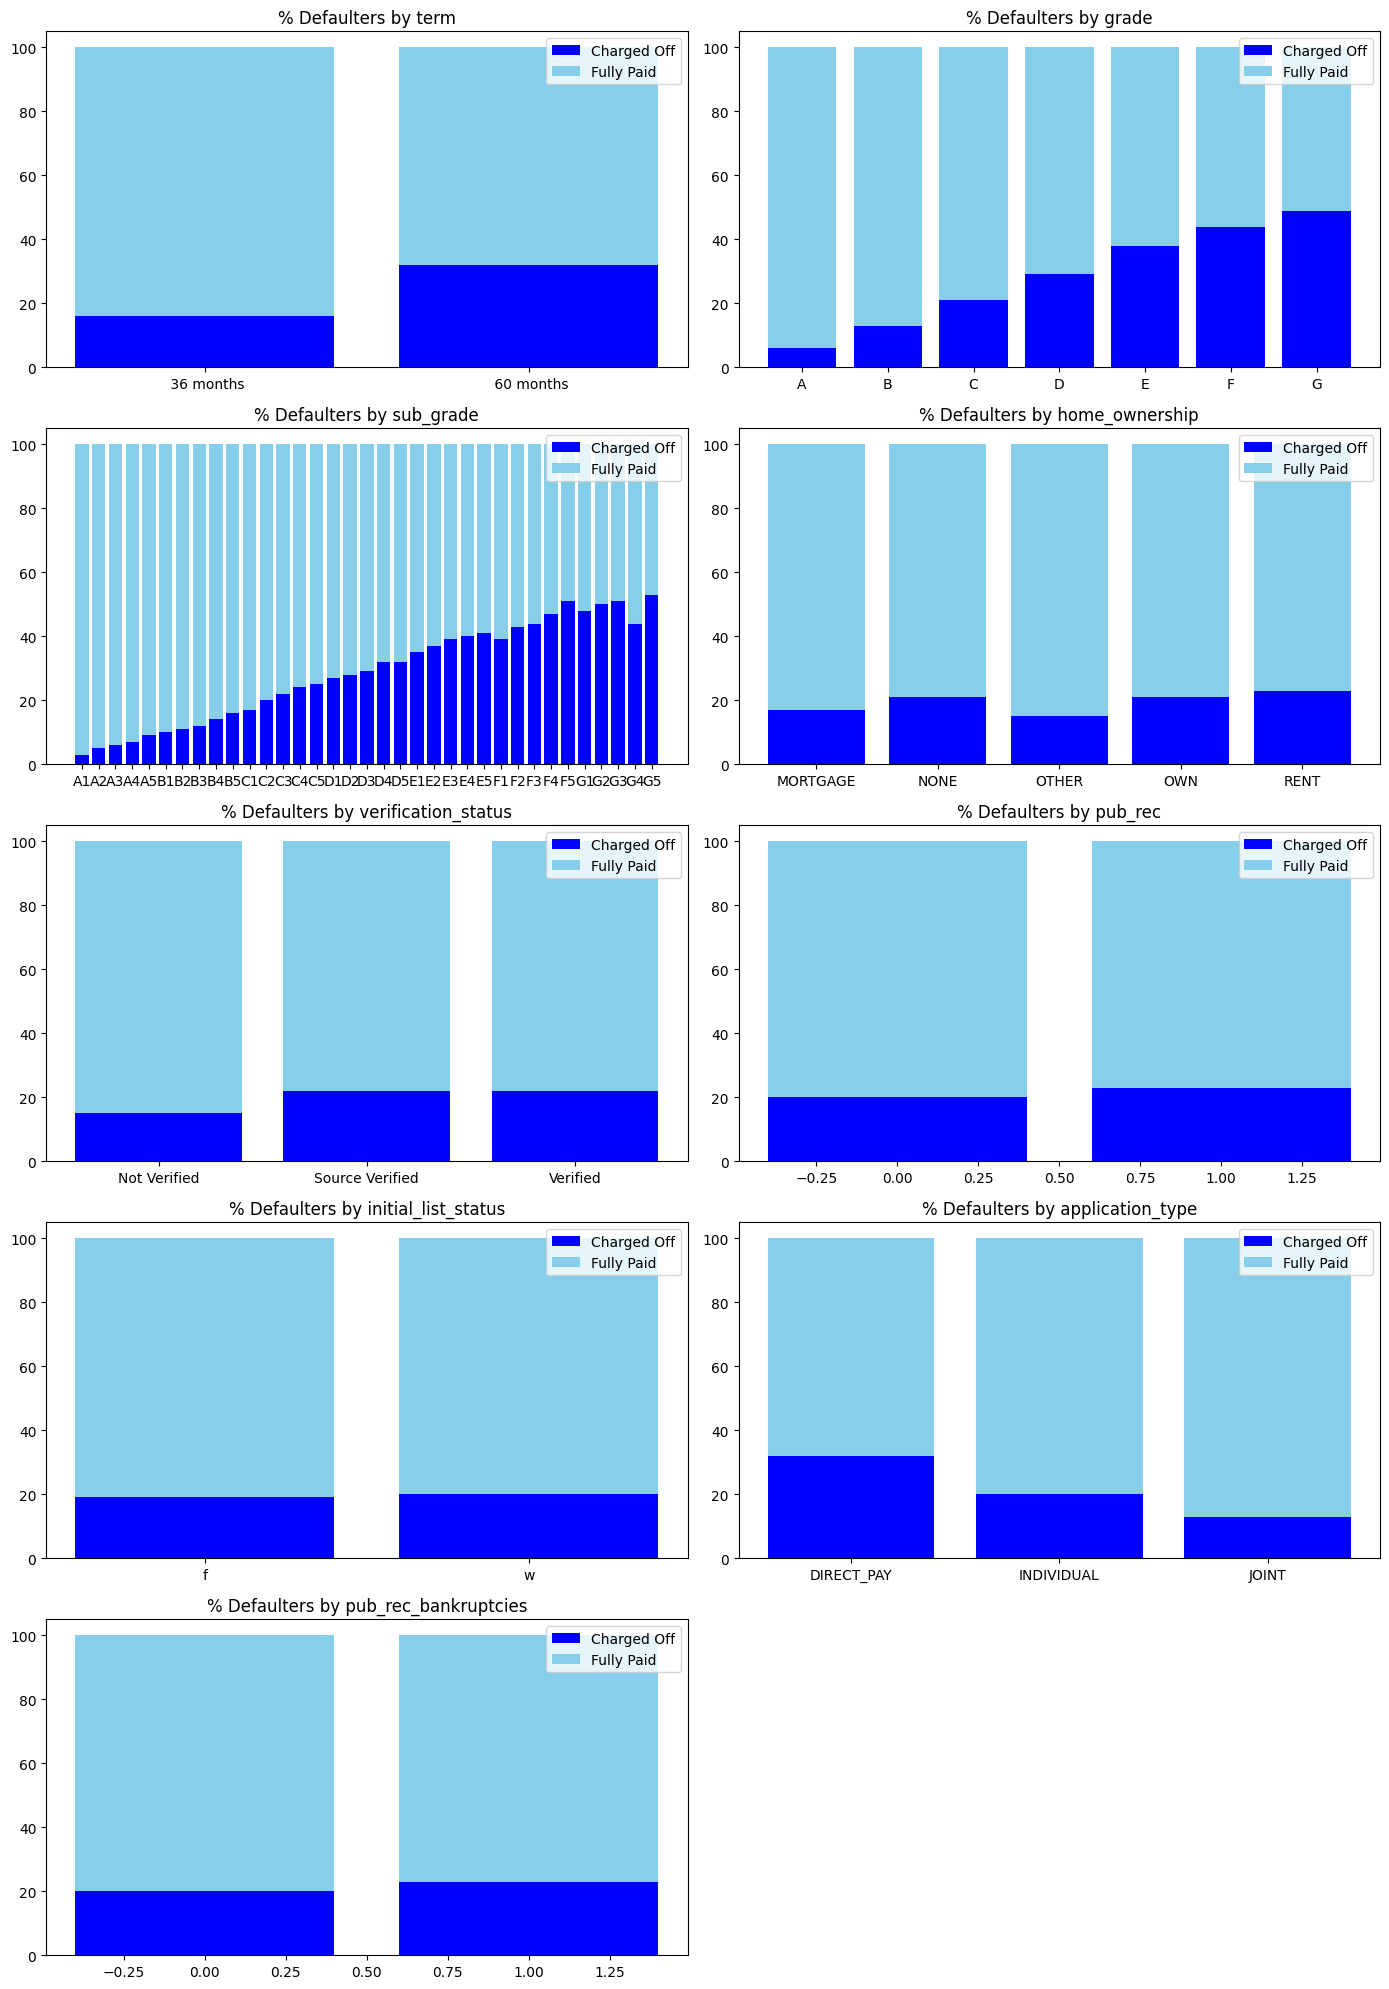

In [123]:
object_cols = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(14,20))

for i in range(len(object_cols)):

  # Creating 5 rows , 2 column subplots

  ax=plt.subplot(5,2,i+1)

  # Pivot of catergoical column vs loan_status

  df1 = data.pivot_table(index= object_cols[i], columns='loan_status', aggfunc='count', values='address')
  count = df1.sum(axis=1)
  df1 = (df1.div(count, axis = 0)*100).round()
  df1.reset_index(inplace=True)

  # Plotting stacked bar charts
  plt.bar(df1[object_cols[i]],df1['Charged Off'], color='blue')
  plt.bar(df1[object_cols[i]],df1['Fully Paid'], color='skyblue', bottom=df1['Charged Off'])
  plt.title(f'% Defaulters by {object_cols[i]}')
  plt.legend(['Charged Off','Fully Paid'])

plt.tight_layout()
plt.show()

Bivariate Analysis: Impact of features on target variable for numerical features

In [128]:
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'date_diff'],
      dtype='object')

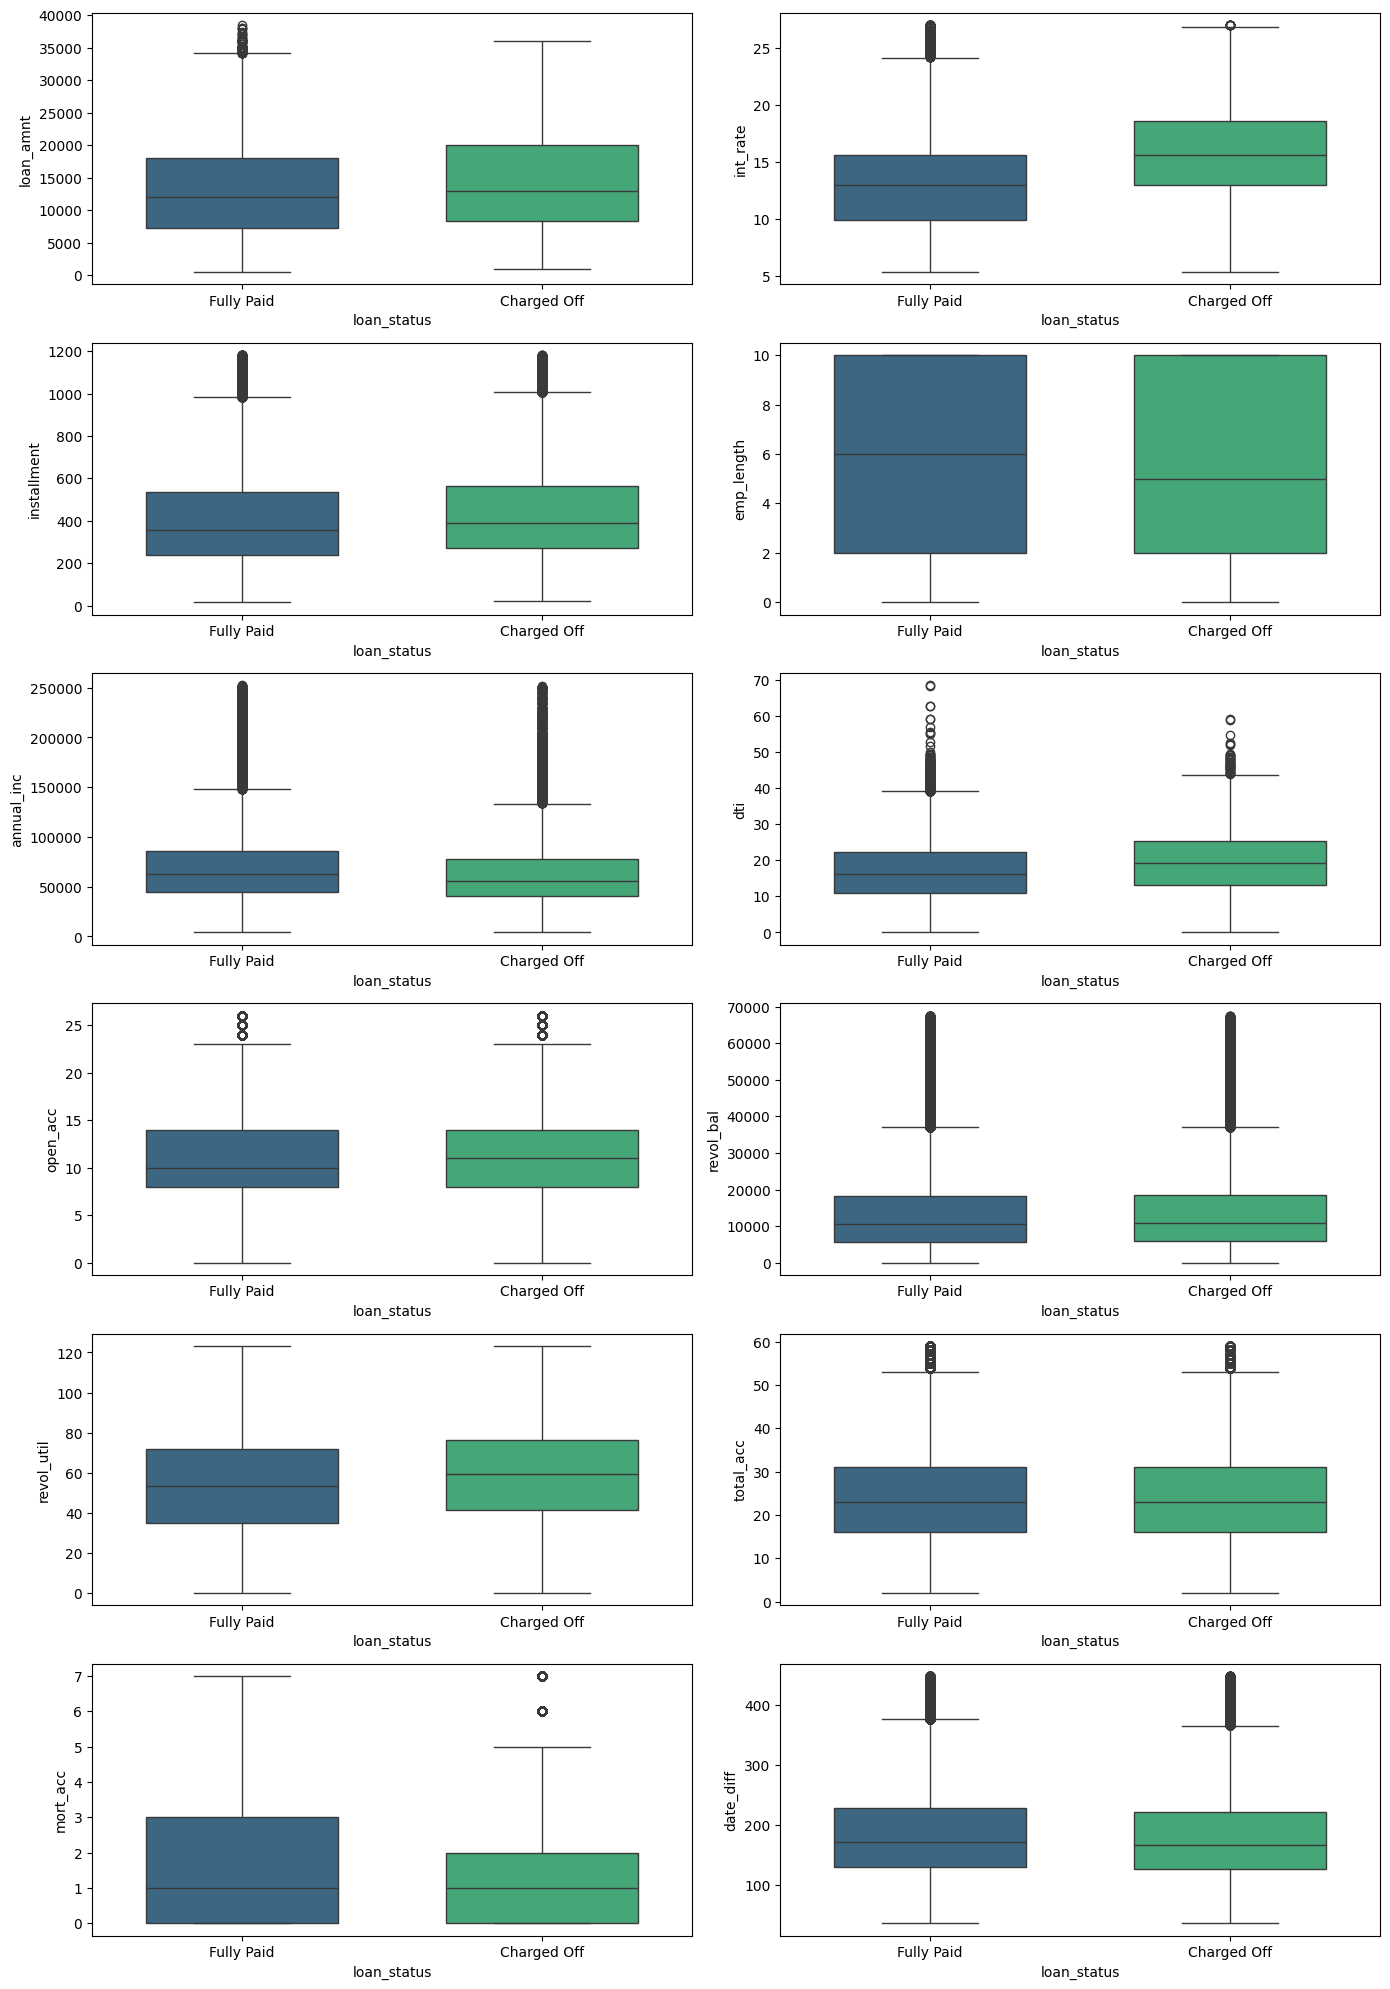

In [138]:
plt.figure(figsize = (14, 20))
for i in range(len(num_cols)):

  ax = plt.subplot(6, 2, i+1)

  sns.boxplot(data = data, x = "loan_status", y = num_cols[i], hue = "loan_status", palette = "viridis", gap = 1.8)
plt.tight_layout()
plt.show()

3. Data preparation for modeling

In [418]:
# Dropping features not related to target variable
df = data.copy()
df = df.drop(columns=['emp_title', 'title','earliest_cr_line','issue_d'])


# Labeling Target Variable (loan_status)
df['loan_status']=df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

# Labeling Binary Variable (term)
df['term']=df['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)
df["initial_list_status"] = df["initial_list_status"].map({'w': 1, 'f':0}).astype(int)

df["pub_rec"] = df["pub_rec"].astype(int)
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].astype(int)

In [419]:
object_cols = df.select_dtypes(include='object').columns
df[object_cols].head()

,grade,sub_grade,home_ownership,verification_status,purpose,application_type,address
0,B,B4,RENT,Not Verified,vacation,INDIVIDUAL,22690
1,B,B5,MORTGAGE,Not Verified,debt_consolidation,INDIVIDUAL,05113
2,B,B3,RENT,Source Verified,credit_card,INDIVIDUAL,05113
3,A,A2,RENT,Not Verified,credit_card,INDIVIDUAL,00813
4,C,C5,MORTGAGE,Verified,credit_card,INDIVIDUAL,11650


Split data into training and testing data.

In [420]:
X = df.drop("loan_status", axis = 1)
Y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_test.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
date_diff               0
dtype: int64

Target Encoding Categorical Columns

In [421]:
for i in object_cols:
  df1 = X_train.join(y_train)
  map_grade = dict(df1.groupby(i)["loan_status"].mean())
  X_train[i] = X_train[i].map(map_grade).astype(float)
  X_test[i] = X_test[i].map(map_grade).astype(float)

X_test.fillna(X_train["home_ownership"].mean(), inplace = True)

In [422]:
X_test.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
date_diff               0
dtype: int64

Standard Scaling the data

In [423]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

4. Build the Logistic Regression model and comment on the model statistics

In [432]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [433]:
model.score(X_test, y_test)

0.8878937318845557

In [434]:
y_train.value_counts()

loan_status
0    234004
1     57184
Name: count, dtype: int64

In [435]:
234004/57184

4.092123670956911

In [436]:
model = LogisticRegression(class_weight = {0 : 1, 1 : 4.1})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 4.1})

In [437]:
model_coef = pd.DataFrame({'Columns': X_train.columns, 'coef':model.coef_[0]}).round(2).sort_values('coef', ascending=False)
model_coef

,Columns,coef
21,address,9.37
5,sub_grade,0.71
1,term,0.21
11,dti,0.18
12,open_acc,0.12
3,installment,0.11
15,revol_util,0.11
7,home_ownership,0.10
9,verification_status,0.07
10,purpose,0.06


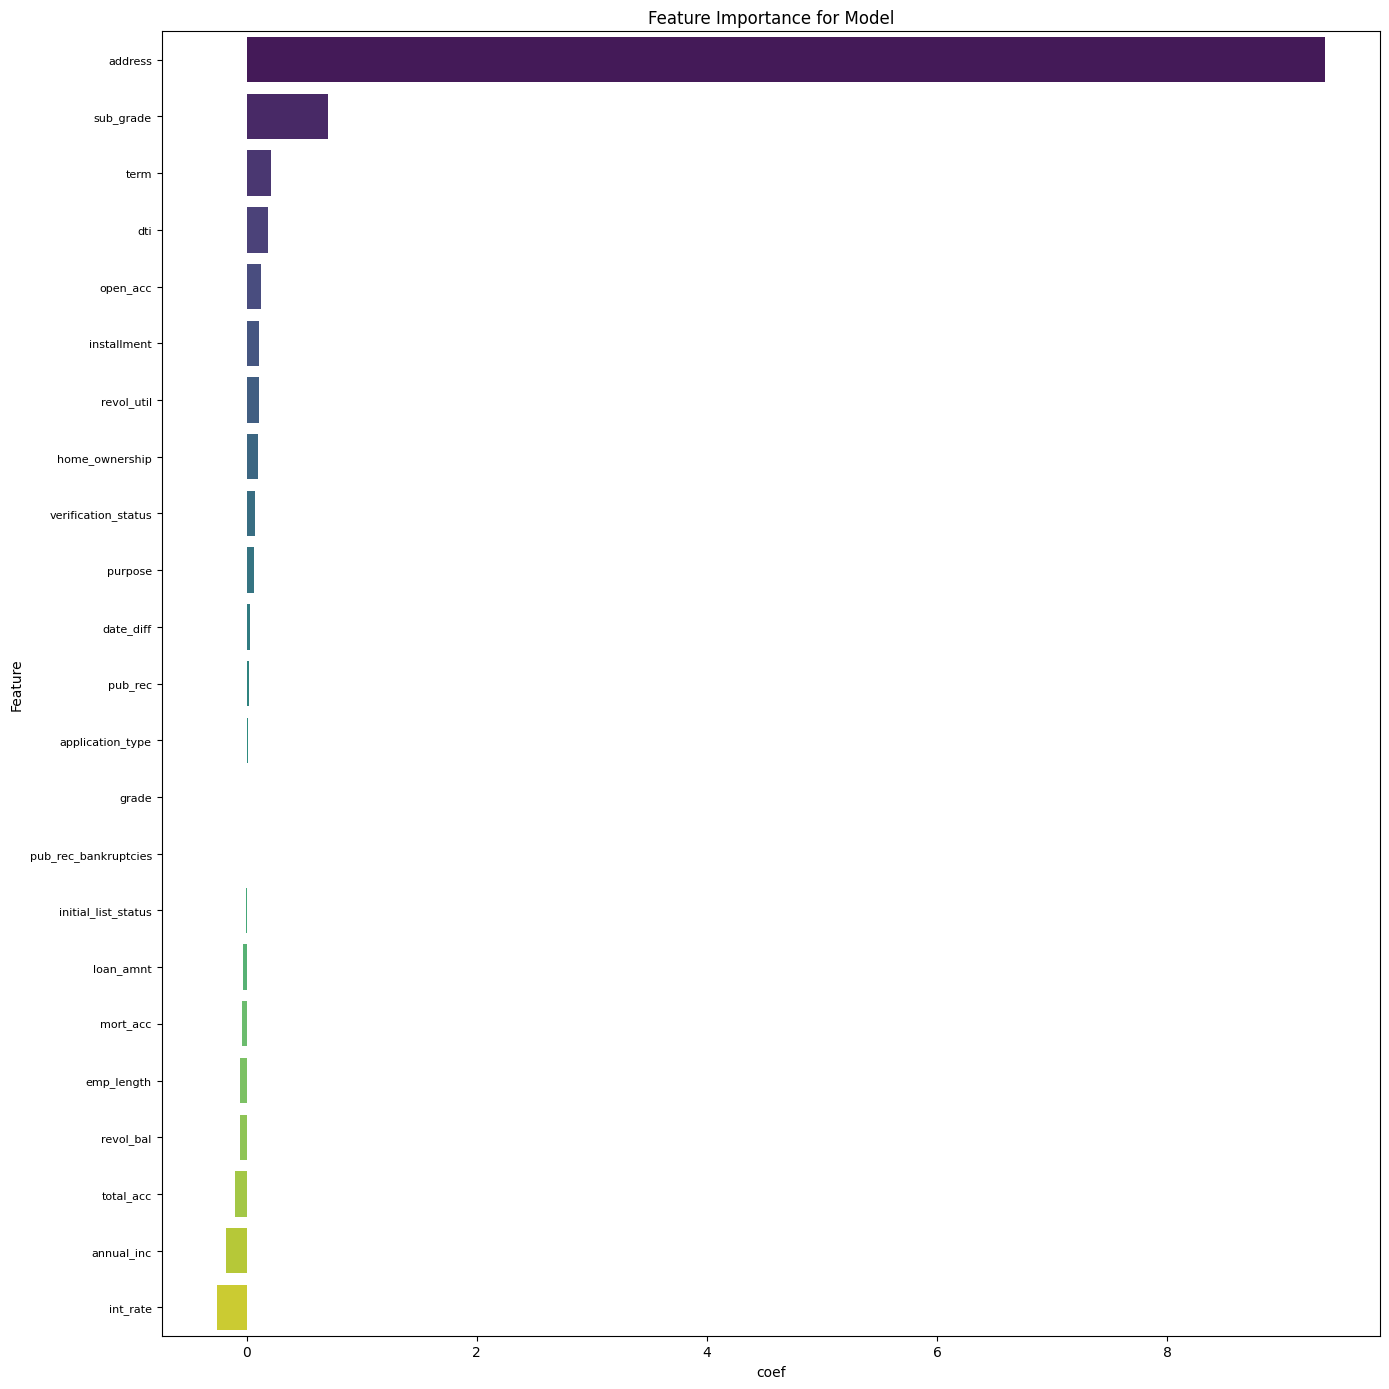

In [438]:
plt.figure(figsize=(14,14))
sns.barplot(y = model_coef['Columns'], x =  model_coef['coef'], palette = "viridis")
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The model has assigned large weightage to address features followed by subgrade, term, dti.

Similarly, large negative coefficients are assigned to a int_rates, followed by annual income and total_acc

In [444]:
print(f"models score on training data is: {round(model.score(X_train, y_train), 2)*100}%")
print(f"models score on testing data is: {round(model.score(X_test, y_test), 2)*100}%")

models score on training data is: 81.0%
models score on testing data is: 81.0%


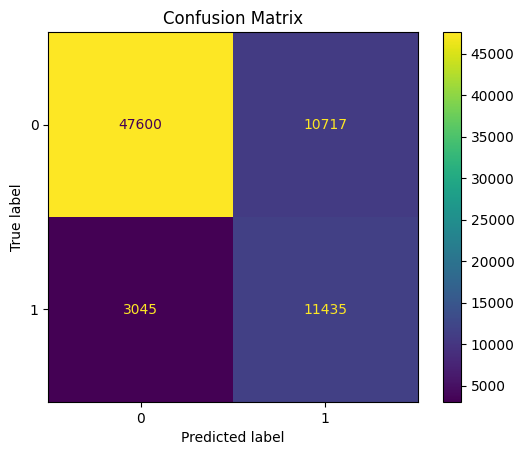

Test F1 Score: 0.62
Test Recall Score: 0.79
Test Precision Score: 0.52


In [458]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Precision = cm[1,1]/(cm[1,1]+cm[0,1])
Recall = cm[1,1]/(cm[1,1]+cm[1,0])
F1_score = (2*Precision*Recall)/(Precision + Recall)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

print('Test F1 Score:',F1_score.round(2))
print('Test Recall Score:',Recall.round(2))
print('Test Precision Score:',Precision.round(2))

In [461]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     58317
           1       0.52      0.79      0.62     14480

    accuracy                           0.81     72797
   macro avg       0.73      0.80      0.75     72797
weighted avg       0.86      0.81      0.82     72797



1. High Recall Score:
The model can correctly identify 80% of the actual defaulters.

2. Low Precision for Positive Class:
Out of all the people predicted to be defaulters, only 50% truly are defaulters.

3. Impact of the Model:
The model helps reduce bad loans by spotting most defaulters.
However, because of low precision, the model might wrongly deny loans to many people who deserve them. This is because it mistakenly labels them as defaulters (false positives).

4. Effect on F1 Score:
The low precision causes the F1 score (a measure of the model’s accuracy) to be only 60%, even though the overall accuracy of the model is 80%.

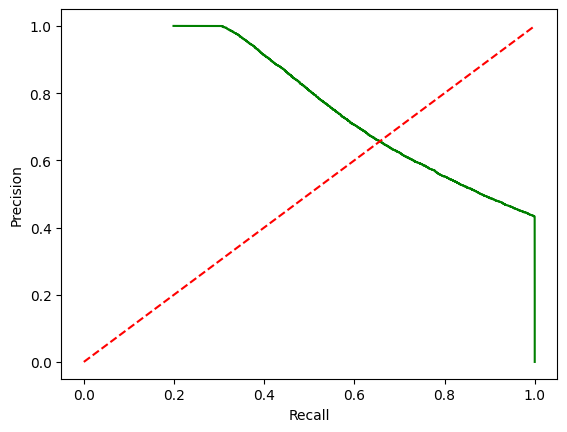

Area under curve for PR AUC 0.78


In [475]:
y_prob = model.predict_proba(X_test)
y_probablities = y_prob[:, 1]
Recall, Precision, thr = precision_recall_curve(y_test, y_probablities)

PR_AUC = average_precision_score(y_test, y_probablities).round(2)

plt.plot(Recall, Precision, color='green')
plt.plot([0,1], [0,1], "--", color = "red")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print(f"Area under curve for PR AUC {PR_AUC}")

the area under precision recall curve is not very high

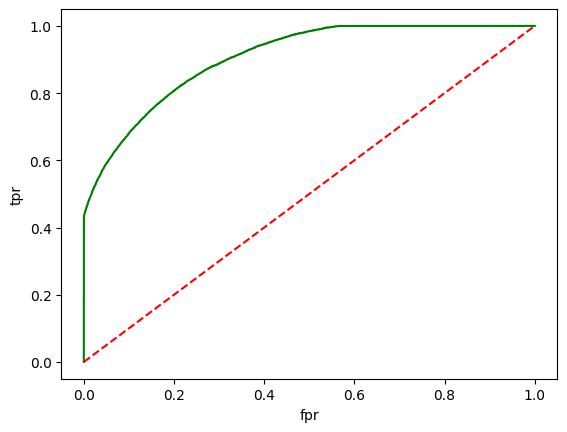

Area under curve for PR AUC 0.9059511540895223


In [485]:
y_prob = model.predict_proba(X_test)
y_probablities = y_prob[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probablities)


roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='green')
plt.plot([0,1], [0,1], "--", color = "red")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

print(f"Area under curve for PR AUC {roc_auc}")

Since AUC score of model is 90%, model prediction is able to classify between the positive and the negative class.

But since data is imbalanced we cannot rely on AUC score, as it is bised towards majority class.

________________________________________________________________________________


Tradeoff Questions:

**Q1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**


Ans:

1. Threshold Adjustment:

  By default, many models classify a prediction as positive if the probability is higher than 0.5. Adjusting this threshold can help balance false positives and false negatives. Increasing the threshold may reduce false positives (increase precision) but could also miss more actual defaulters (decrease recall).


2. Evaluate Trade-offs:

  Use the Precision-Recall curve to find the optimal threshold where the trade-off between precision and recall is optimal.

.
.

**Q2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone**

Ans:

Recall score is an indicator of how many actual defaulters are flagged by the model. By increasing the recall score, we can minimise false negatives (type2 error) and ensure that loans are not disbursed to defaulters.

-------------------------------------------------------------------------------




**Insights:**

* **Impact of Categorical Attributes on loan_status (target variable):**

1. The % of defaulters is much higher for longer (60-month) term

2. grade/sub-grade has the maximum impact on loan_status with highest grade
   having maximum defaulters

3. We can remove initial_list_status and emp_title/title as they have no impact
   on loan_status

4. Direct pay application type has higher default rate compared to individual/
   joint

5. Loan taken for the purpose of small business has the highest rate of default


* **Impact of Numerical Attributes on loan_status (target variable):**

1. It can be observed that the mean loan_amnt, int_rate, dti, open_acc and
   revol_util are higher for defaulters

2. The mean annual income is lower for defaulters

* **A Logistic Regression model (trained after applying class weights to the data
  to balance the target variable) performed well, rendering accuracy of 80%.**

* **The model had a precision score of 94%, recall score of 82%, and f1 score of
  87% on the negative class**


* **The model had a precision score of 52%, recall score of 82%, and f1 score of 87% on the positive class.**

* **The ROC plot shows that the area under ROC curve is 0.90, which signifies that the model is able to differentiate well between both classes**

* **The area under Precision Recall curve is 0.78 (can be improved using hyperparameter tuning/increasing model complexity)**

--------------------------------------------------------------------------------


**Recommendations:**

* The optimal strategy to achieve the objective of balancing the risk of increasing NPAs by disbursing loans to defaulters with the opportunity to earn interest by disbursing loans to as many worthy customers as possible: maximise the F1 score along with the area under Precision Recall Curve (precision-recall trade-off)

* More complex classifiers like random forest would give better results compared to logistic regression because they are not restricted by the linearity of decision boundary
--------------------------------------------------------------------------------